In [1]:
from sklearn.datasets import make_moons
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
X, y = make_moons(n_samples=150, noise=0.15, random_state=42)

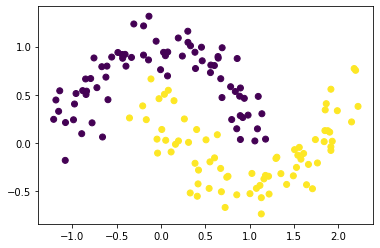

In [3]:
plt.scatter(X[:,0], X[:,1], c=y); # 2 columns of X data

In [4]:
X.shape[0]

150

In [5]:
# adding a bias
def add_bias(X):
    return np.hstack([X, np.ones((X.shape[0], 1))])

In [6]:
# calculating the sigmoid (function returns a NumPy array,where the original values x have been transformed by the sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
test = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(test).round(2) == expected)

In [8]:
#  initializing the weights
# number of neurons (input, first hidden layer)
n_neurons = 2

weights = []
weights.append(np.random.randn(X.shape[1], n_neurons)) # between input and hidden
weights.append(np.random.randn(n_neurons+1, 1)) # between hidden and output

weights

[array([[-1.20486782,  0.02358108],
        [ 1.18640555,  0.7861653 ]]), array([[-0.78846492],
        [ 1.20449442],
        [-0.07980374]])]

# Feed-forward network

In [9]:
def feed_forward(X, weights):

    """
    1. Multiply the input matrix X (shape of (150, 3))
       with the weights of the first layer (shape of (3, 2)),
       resulting in the matrix of the shape (150, 2)
    """
    input_layer_1 = np.dot(X, weights[0]) 
    print(f"Shape of the first input for layer 1 after dot product: {input_layer_1.shape}")

    """    
    2. Apply the sigmoid function on the result,
       preserving the shape (150, 2) 
    """
    output_layer_1 = sigmoid(input_layer_1)
    print(f"Shape of the output of layer 1: {output_layer_1.shape}")
    
    """    
    3. Append an extra column of ones to the result (i.e. the bias),
       resulting in the shape (150, 3)
    """
    hidden_1 = add_bias(output_layer_1)
    print(f"Shape of the hidden l1 input with biases: {hidden_1.shape}")

    """    
    4. Multiply the output of the previous step (shape of (50, 3))
       with the weights of the second (i.e. outer) layer (shape of (3, 1)),
       resulting in the shape (50, 1)
    """
    input_layer_2 = np.dot(hidden_1, weights[1])
    print(f"Shape of the hidden l1 (overall l2) input weighted sum: {input_layer_2.shape}")

    """    
    5. Apply the sigmoid function on the result, shape remains (50, 1)
    """
    output_layer_2 = sigmoid(input_layer_2)
    
    """    
    6. Return all intermediate results (i.e. anything that
       an activation function outputs).
    """

    return output_layer_1, output_layer_2

In [10]:
output_layer_1, output_layer_2 = feed_forward(X, weights)

Shape of the first input for layer 1 after dot product: (150, 2)
Shape of the output of layer 1: (150, 2)
Shape of the hidden l1 input with biases: (150, 3)
Shape of the hidden l1 (overall l2) input weighted sum: (150, 1)


Text(0.5, 1.0, 'predicted classes with FFN')

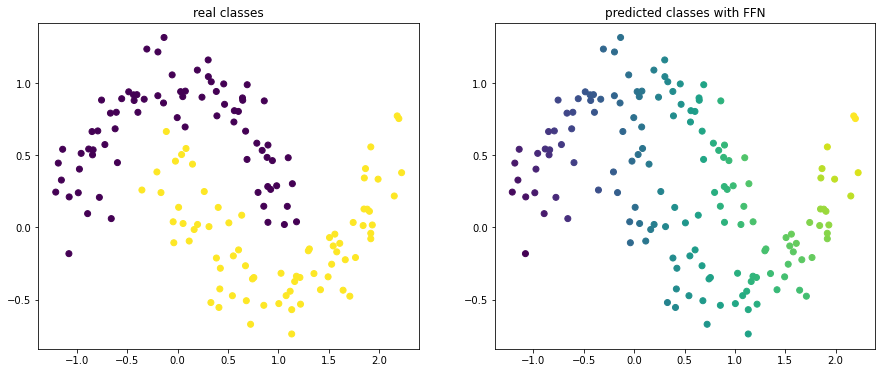

In [11]:
f = plt.figure(figsize=(15,6))
ax1 = f.add_subplot(121)  # row 1, col 2, index 1
ax2 = f.add_subplot(122)
x = np.linspace(0,4,1000)
ax1.scatter(X[:,0], X[:,1], c = y)
ax1.set_title('real classes')

ax2.scatter(X[:,0], X[:,1], c = output_layer_2)
ax2.set_title('predicted classes with FFN')

# Backpropagation

In [12]:
output_layer_1, output_layer_2 = feed_forward(X, weights)

Shape of the first input for layer 1 after dot product: (150, 2)
Shape of the output of layer 1: (150, 2)
Shape of the hidden l1 input with biases: (150, 3)
Shape of the hidden l1 (overall l2) input weighted sum: (150, 1)


In [13]:
def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

In [14]:
def log_loss(ytrue, ypred):
    ''' return the log loss'''
    loss = -(y*np.log(ypred)+(1-y)*np.log(1-ypred)) 
    return loss

In [15]:
# test
y = np.array([0.0, 0.0, 1.0, 1.0])
ypred = np.array([0.01, 0.99, 0.01, 0.99])
expected = np.array([0.01, 4.61, 4.61, 0.01])
assert np.all(log_loss(y, ypred).round(2) == expected)

In [16]:
def log_loss_deriv(y, ypred):
    loss_deriv = -(y/ypred - (1-y)/(1-ypred))
    return loss_deriv

In [17]:
a = np.array([0.5, 0.3, 0.99, 0.2])
b = np.array([0.4, 0.2, 0.10, 0.3])
expected = np.array([-0.42, -0.62, -9.89, 0.48])
assert np.all(log_loss_deriv(a, b).round(2) == expected)

In [18]:
output_layer_1, output_layer_2 = feed_forward(X, weights)
ytrue = y.reshape(-1, 1)

Shape of the first input for layer 1 after dot product: (150, 2)
Shape of the output of layer 1: (150, 2)
Shape of the hidden l1 input with biases: (150, 3)
Shape of the hidden l1 (overall l2) input weighted sum: (150, 1)


In [19]:
loss = log_loss(ytrue, output_layer_2)

In [20]:
ytrue.shape

(4, 1)

In [21]:
output_layer_2.shape

(150, 1)

In [22]:
loss.shape

(150, 4)

In [23]:
#print(output_layer_2, ytrue, loss)

In [24]:
def backprop(weights,
             output1,
             output2,
             ytrue,
             X_input,
             lr):

    wH = weights[0]
    wO = weights[1]

    '''EQUATION A:'''
    error = log_loss_deriv(ytrue, output2)
    
    '''EQUATION B:'''
    #don't forget the bias!
    hidden_out_with_bias = add_bias(output1)
    #derivative of the sigmoid function with respect to the
    #hidden output * weights
    sig_deriv_1 = sigmoid_deriv(hidden_out_with_bias.dot(wO))
    y_grad = sig_deriv_1 * error

    '''EQUATION C:'''
    delta_wO = -np.dot(y_grad.T, hidden_out_with_bias) * lr

    #and finally, old weights + delta weights -> new weights!
    wO_new = wO + delta_wO.T

    '''EQUATION D:'''
    sig_deriv_2 = sigmoid_deriv(X_input.dot(wH))
    #exclude the bias (last column) of the outer weights,
    #since it is not backpropagated!
    H_grad = sig_deriv_2 * np.dot(y_grad , wO[:-1].T)
    
    '''EQUATION E:'''
    delta_wH = -np.dot(H_grad.T, X_input) * lr
    #old weights + delta weights -> new weights!
    wH_new = wH + delta_wH.T
    
    # new hidden weights, new output weights
    return wH_new, wO_new

In [25]:
lr = 0.01 # - change the value for learning rate in backprop to see how your model performance changes
n_neurons = 5 # change the number of neurons to see how the performance of NN changes
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X = add_bias(X)
y = y.reshape(-1, 1)
weights = [
   np.random.randn(3, n_neurons),
   np.random.randn(n_neurons+1, 1)
]

# train
LOSS_VEC = []

for i in range(1000):
    out1, out2 = feed_forward(X, weights)
    LOSS_VEC.append(log_loss(y, out2).sum())
    new_weights = backprop(weights, out1, out2, y, X, lr)
    weights = new_weights

Shape of the first input for layer 1 after dot product: (200, 5)
Shape of the output of layer 1: (200, 5)
Shape of the hidden l1 input with biases: (200, 6)
Shape of the hidden l1 (overall l2) input weighted sum: (200, 1)
Shape of the first input for layer 1 after dot product: (200, 5)
Shape of the output of layer 1: (200, 5)
Shape of the hidden l1 input with biases: (200, 6)
Shape of the hidden l1 (overall l2) input weighted sum: (200, 1)
Shape of the first input for layer 1 after dot product: (200, 5)
Shape of the output of layer 1: (200, 5)
Shape of the hidden l1 input with biases: (200, 6)
Shape of the hidden l1 (overall l2) input weighted sum: (200, 1)
Shape of the first input for layer 1 after dot product: (200, 5)
Shape of the output of layer 1: (200, 5)
Shape of the hidden l1 input with biases: (200, 6)
Shape of the hidden l1 (overall l2) input weighted sum: (200, 1)
Shape of the first input for layer 1 after dot product: (200, 5)
Shape of the output of layer 1: (200, 5)
Shape 

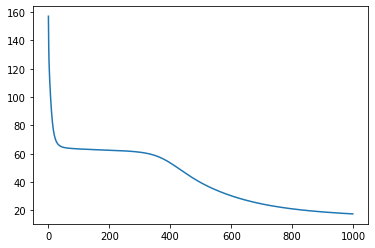

In [26]:
plt.plot(LOSS_VEC)

In [27]:
# create a grid of values
x = np.linspace(-3, 3, 200)
X_vis = np.array([(x1, x2) for x1 in x for x2 in x])
# add the bias column
X_vis = add_bias(X_vis)

# calculate the (random) predictions
_, y_pred = feed_forward(X_vis, weights)

Shape of the first input for layer 1 after dot product: (40000, 5)
Shape of the output of layer 1: (40000, 5)
Shape of the hidden l1 input with biases: (40000, 6)
Shape of the hidden l1 (overall l2) input weighted sum: (40000, 1)


Shape of the first input for layer 1 after dot product: (40000, 5)
Shape of the output of layer 1: (40000, 5)
Shape of the hidden l1 input with biases: (40000, 6)
Shape of the hidden l1 (overall l2) input weighted sum: (40000, 1)


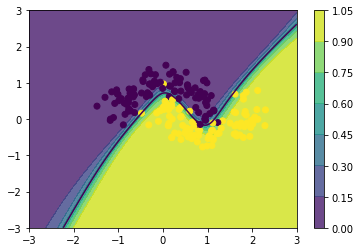

In [28]:
# create the data
x = np.linspace(-3, 3, 200)
X_vis = np.array([(x1, x2) for x1 in x for x2 in x])
X_vis = add_bias(X_vis)
_, y_pred = feed_forward(X_vis, weights)
Z = y_pred.reshape((len(x), len(x)), order='F')

# plotting
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x, x, Z, alpha=0.8)
ax.contour(x, x, Z, levels=[0.5])
fig.colorbar(cp) # Add a colorbar to a plot
ax.scatter(X[:,0], X[:,1], c=y);